In [5]:
import pangolin as pg
from matplotlib import pyplot as plt
import numpy as np

In [2]:
z = pg.normal(1,5)
x = pg.normal(z,3)
z_samples = pg.sample(z,x,4,niter=100000)

In [6]:
def hist_samples(z_sample):
    plt.figure(figsize=(10,2))
    plt.hist(z_sample,np.arange(-10,10,.2),density=True)
    plt.xlabel('z')
    plt.ylabel('count')

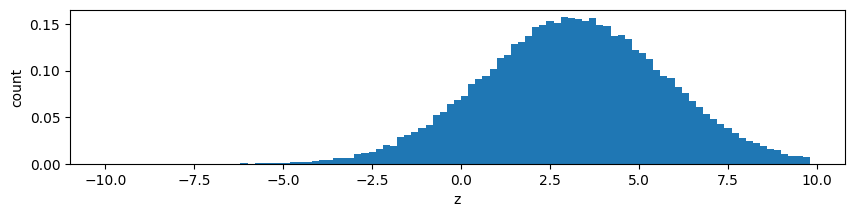

In [7]:
hist_samples(z_samples)

In [11]:
def normal_log_pdf(x, loc, scale):
    return -(x-loc)**2/(2*scale**2) - (1/2)*np.log(2*np.pi*scale**2)

def log_prior(z):
    return normal_log_pdf(z, 1, 5)

def log_likelihood(z):
    return normal_log_pdf(4, z, 3)

def log_posterior_unnormalized(z):
    return log_prior(z) + log_likelihood(z)

In [47]:
def metropolis(jump_size, niter):
    z = 0.0
    l = log_posterior_unnormalized(z)
    z_samples = []
    for i in range(niter):
        z_new = z + jump_size * np.random.randn()
        l_new = log_posterior_unnormalized(z_new)
        if np.random.rand() < np.exp(l_new - l): # same as p_new / p
            z = z_new
            l = l_new
        z_samples.append(z)
    return np.array(z_samples)

In [48]:
z_samples=metropolis(.1, 100)

In [49]:
def plot_mcmc(z_samples):
    plt.figure(figsize=(10,2))
    iters = np.arange(len(z_samples))
    plt.plot(iters, z_samples,'k-')
    same = z_samples[:-1] == z_samples[1:]
    plt.plot(iters[1:][same], z_samples[1:][same], 'r.', ms=3)
    plt.xlabel('iters')
    plt.ylabel('z')
    plt.show()

    hist_samples(z_samples)


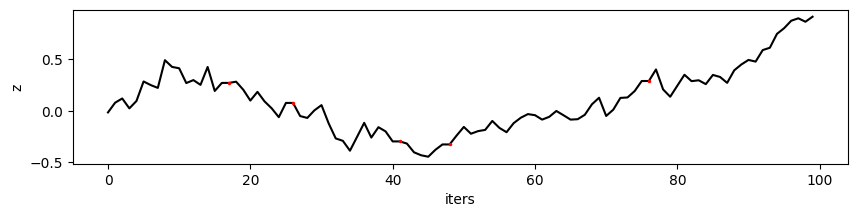

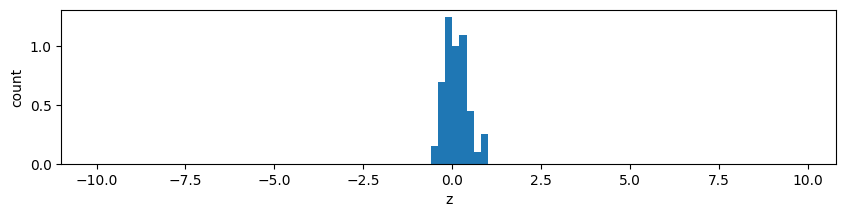

In [50]:
z_samples=metropolis(.1, 100)
plot_mcmc(z_samples)

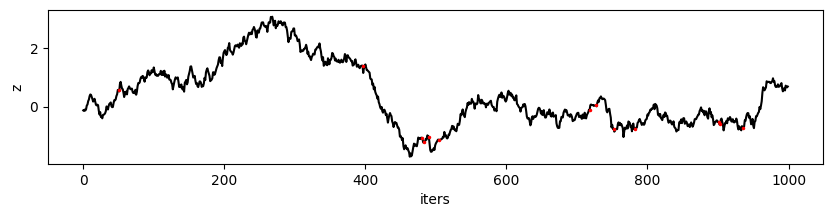

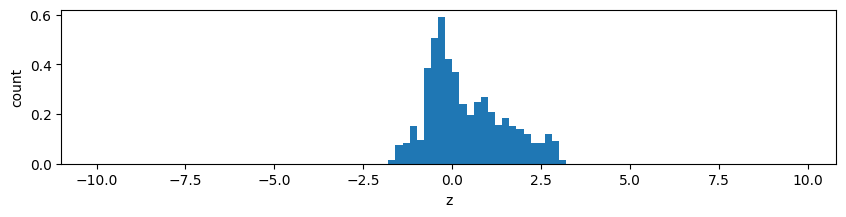

In [51]:
z_samples=metropolis(.1, 1000)
plot_mcmc(z_samples)

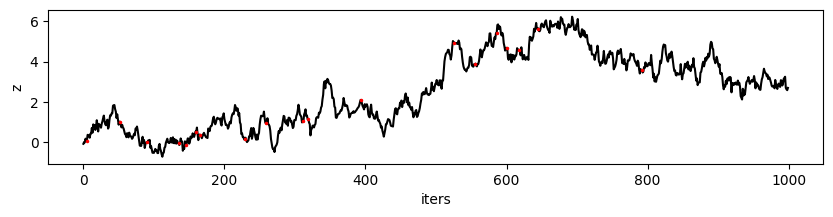

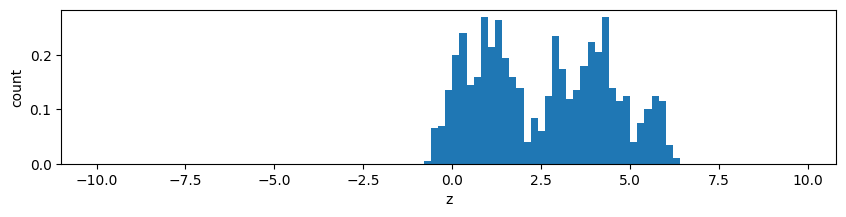

In [52]:
z_samples=metropolis(.2, 1000)
plot_mcmc(z_samples)

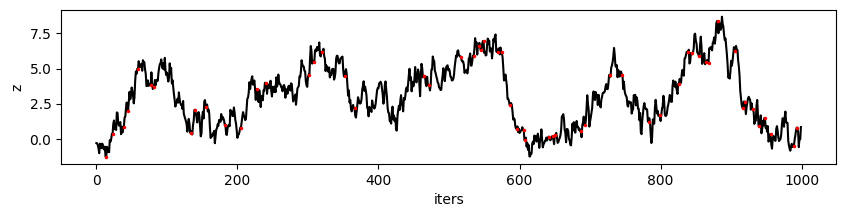

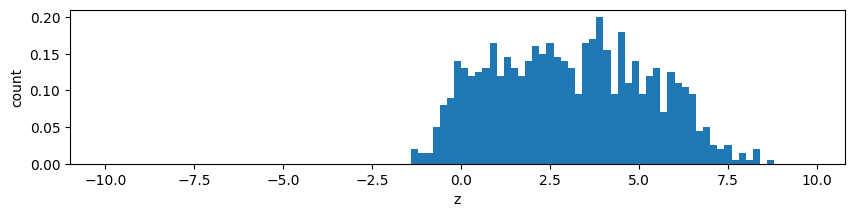

In [53]:
z_samples=metropolis(.5, 1000)
plot_mcmc(z_samples)

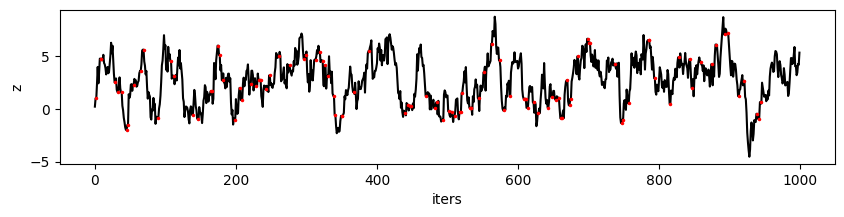

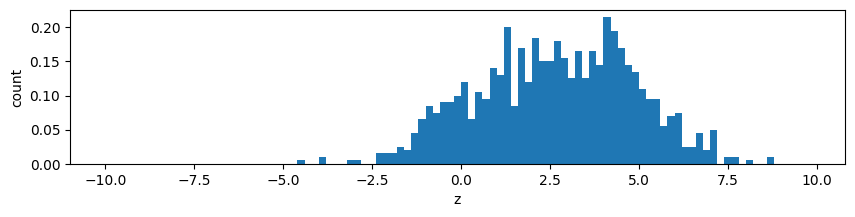

In [55]:
z_samples=metropolis(1, 1000)
plot_mcmc(z_samples)

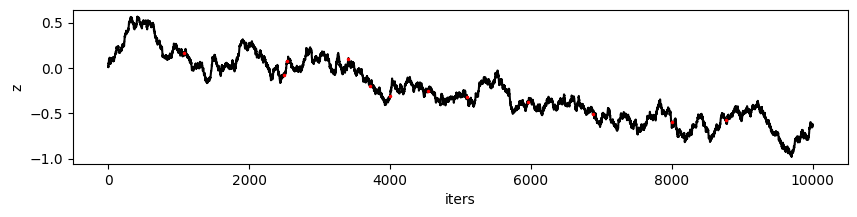

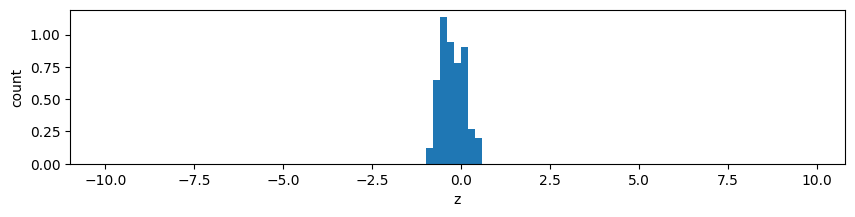

In [56]:
z_samples=metropolis(.01, 10000)
plot_mcmc(z_samples)

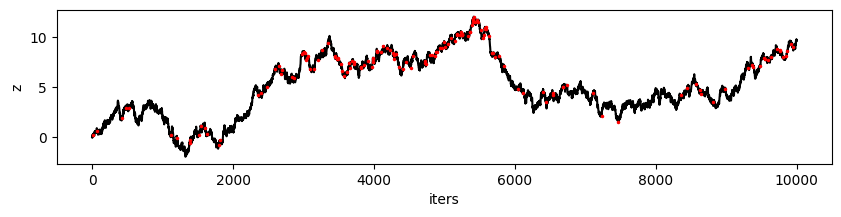

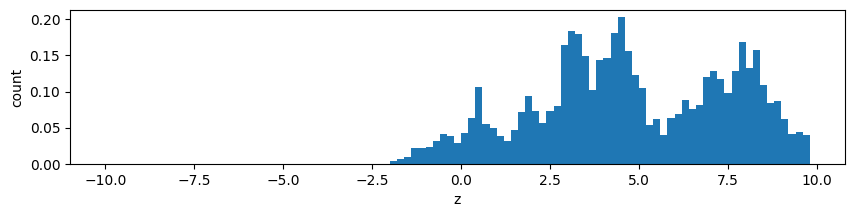

In [57]:
z_samples=metropolis(.1, 10000)
plot_mcmc(z_samples)

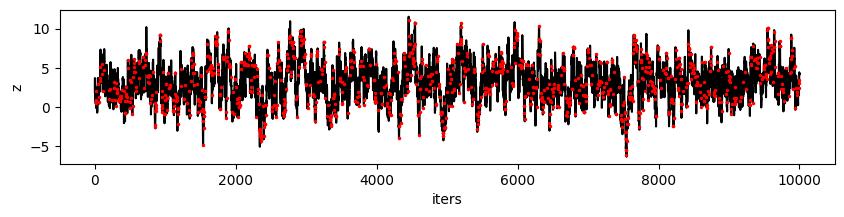

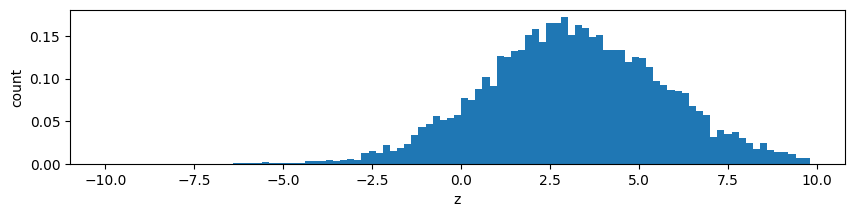

In [58]:
z_samples=metropolis(1, 10000)
plot_mcmc(z_samples)

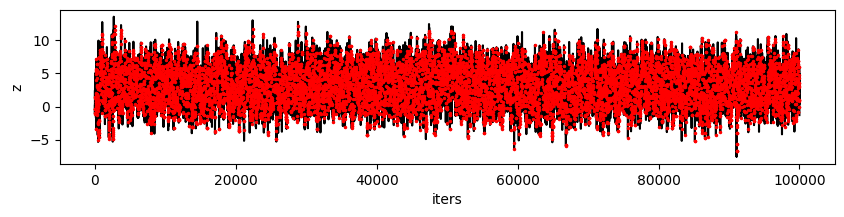

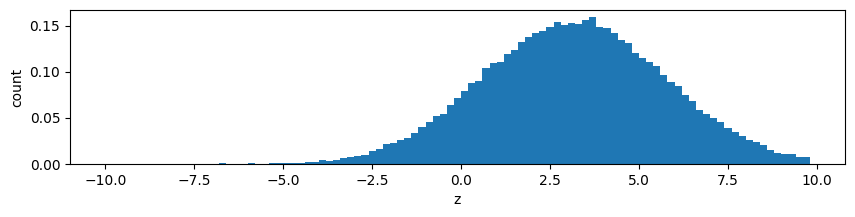

In [59]:
z_samples=metropolis(1, 100000)
plot_mcmc(z_samples)